In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from numpy.random import normal
import math
import usefulFunctions
from usefulFunctions import checkForNull
from IPython.core.debugger import Tracer
import random
import numpy
from statsmodels.formula.api import ols
from usefulFunctions import computeMean
from usefulFunctions import computeStdev
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import usefulFunctions as useful

In [2]:
fileName = "Master_PL.xlsx - Master_PL.csv"
normalized_table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

In [6]:
normalized_table.head()

,id,type,gender,age,monthsFromScreening,protein_BL,protein_V4,protein_V6,protein_V8,protein_V10,protein_V12
0,3011,0,1,32,NaN,26.0,NaN,NaN,NaN,NaN,NaN
1,3016,0,1,58,NaN,66.0,67.0,70.0,56.0,NaN,NaN
2,3069,0,0,54,NaN,24.0,34.0,32.0,30.0,33.0,NaN
3,3072,0,0,47,NaN,44.0,55.0,37.0,NaN,40.0,37.0
4,3073,0,1,48,NaN,68.0,64.0,77.0,NaN,65.0,79.0


In [4]:
# (lambda x: your_func(a,b,c,d,...,x))
def make_binary(x):
    return x-1

def standardize(x, mean, std):
    return (x - mean)/std

In [5]:
normalized_table.type = normalized_table.type.apply(make_binary)
normalized_table.gender = normalized_table.gender.apply(make_binary)

In [7]:
normalized_table.head()

,id,type,gender,age,monthsFromScreening,protein_BL,protein_V4,protein_V6,protein_V8,protein_V10,protein_V12
0,3011,0,1,32,NaN,26.0,NaN,NaN,NaN,NaN,NaN
1,3016,0,1,58,NaN,66.0,67.0,70.0,56.0,NaN,NaN
2,3069,0,0,54,NaN,24.0,34.0,32.0,30.0,33.0,NaN
3,3072,0,0,47,NaN,44.0,55.0,37.0,NaN,40.0,37.0
4,3073,0,1,48,NaN,68.0,64.0,77.0,NaN,65.0,79.0


In [8]:
age_mean = np.mean(table.age)
age_std = np.std(table.age)

monthsFromScreening_mean = np.mean(table.monthsFromScreening)
monthsFromScreening_std = np.std(table.monthsFromScreening)

In [9]:
normalized_table.age = normalized_table.age.apply(lambda x: standardize(x, age_mean, age_std))

In [10]:
normalized_table.monthsFromScreening = normalized_table.monthsFromScreening.apply(lambda x: standardize(x, 
                                                                                             monthsFromScreening_mean,\
                                                                                             monthsFromScreening_std))

In [11]:
normalized_table.head()

,id,type,gender,age,monthsFromScreening,protein_BL,protein_V4,protein_V6,protein_V8,protein_V10,protein_V12
0,3011,0,1,-2.866796,NaN,26.0,NaN,NaN,NaN,NaN,NaN
1,3016,0,1,-0.323765,NaN,66.0,67.0,70.0,56.0,NaN,NaN
2,3069,0,0,-0.715000,NaN,24.0,34.0,32.0,30.0,33.0,NaN
3,3072,0,0,-1.399662,NaN,44.0,55.0,37.0,NaN,40.0,37.0
4,3073,0,1,-1.301854,NaN,68.0,64.0,77.0,NaN,65.0,79.0


In [12]:
normalized_model_with_type = ols('protein_BL ~ type + gender + age', normalized_table).fit()
model_with_type = ols('protein_BL ~ type + gender + age', table).fit()

normalized_model_with_screening = ols('protein_BL ~ gender + age + monthsFromScreening', normalized_table).fit()
model_with_screening = ols('protein_BL ~ gender + age + monthsFromScreening', table).fit()

In [15]:
print(normalized_model_with_type.summary()) 

                            OLS Regression Results                            
Dep. Variable:             protein_BL   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     21.92
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           1.92e-13
Time:                        08:02:14   Log-Likelihood:                -2475.1
No. Observations:                 571   AIC:                             4958.
Df Residuals:                     567   BIC:                             4976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3660      1.731     19.275      0.0

In [79]:
print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_BL   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     12.02
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.55e-07
Time:                        19:18:22   Log-Likelihood:                -1725.3
No. Observations:                 391   AIC:                             3459.
Df Residuals:                     387   BIC:                             3474.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.4843    

In [80]:
normalized_model_with_type = ols('protein_V4 ~ type + gender + age', normalized_table).fit()
normalized_model_with_screening = ols('protein_V4 ~ gender + age + monthsFromScreening', normalized_table).fit()

In [81]:
print(normalized_model_with_type.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V4   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           3.91e-07
Time:                        19:21:15   Log-Likelihood:                -2000.5
No. Observations:                 430   AIC:                             4009.
Df Residuals:                     426   BIC:                             4025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9165      2.765     12.268      0.0

In [82]:
 print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V4   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.273
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           0.000389
Time:                        19:22:04   Log-Likelihood:                -1380.7
No. Observations:                 290   AIC:                             2769.
Df Residuals:                     286   BIC:                             2784.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              36.3614    

In [83]:
normalized_model_with_type = ols('protein_V6 ~ type + gender + age', normalized_table).fit()
normalized_model_with_screening = ols('protein_V6 ~ gender + age + monthsFromScreening', normalized_table).fit()

In [84]:
print(normalized_model_with_type.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V6   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.113
Date:                Sun, 01 Oct 2017   Prob (F-statistic):            0.00683
Time:                        19:22:39   Log-Likelihood:                -1952.6
No. Observations:                 403   AIC:                             3913.
Df Residuals:                     399   BIC:                             3929.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7009      3.426     10.712      0.0

In [85]:
 print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V6   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.593
Date:                Sun, 01 Oct 2017   Prob (F-statistic):             0.0530
Time:                        19:22:48   Log-Likelihood:                -1304.3
No. Observations:                 276   AIC:                             2617.
Df Residuals:                     272   BIC:                             2631.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              39.2758    

In [89]:
normalized_model_with_type = ols('protein_V8 ~ type + gender + age', normalized_table).fit()
normalized_model_with_screening = ols('protein_V8 ~ gender + age + monthsFromScreening', normalized_table).fit()

In [90]:
print(normalized_model_with_type.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V8   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     13.91
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.26e-08
Time:                        19:25:39   Log-Likelihood:                -1676.5
No. Observations:                 384   AIC:                             3361.
Df Residuals:                     380   BIC:                             3377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.6474      2.205     15.262      0.0

In [91]:
print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:             protein_V8   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.07e-06
Time:                        19:26:05   Log-Likelihood:                -1197.7
No. Observations:                 269   AIC:                             2403.
Df Residuals:                     265   BIC:                             2418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.6401    

In [92]:
normalized_model_wi      bth_type = ols('protein_V10 ~ type + gender + age', normalized_table).fit()
normalized_model_with_screening = ols('protein_V10 ~ gender + age + monthsFromScreening', normalized_table).fit()

In [93]:
print(normalized_model_with_type.summary())

                            OLS Regression Results                            
Dep. Variable:            protein_V10   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     13.66
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.75e-08
Time:                        19:26:39   Log-Likelihood:                -1111.0
No. Observations:                 257   AIC:                             2230.
Df Residuals:                     253   BIC:                             2244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2839      2.517     13.620      0.0

In [94]:
print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:            protein_V10   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     10.43
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.45e-06
Time:                        19:27:00   Log-Likelihood:                -762.76
No. Observations:                 174   AIC:                             1534.
Df Residuals:                     170   BIC:                             1546.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              36.9221    

In [95]:
normalized_model_with_type = ols('protein_V12 ~ type + gender + age', normalized_table).fit()
normalized_model_with_screening = ols('protein_V12 ~ gender + age + monthsFromScreening', normalized_table).fit()

In [96]:
print(normalized_model_with_type.summary())

                            OLS Regression Results                            
Dep. Variable:            protein_V12   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.934
Date:                Sun, 01 Oct 2017   Prob (F-statistic):             0.0102
Time:                        19:29:07   Log-Likelihood:                -563.56
No. Observations:                 123   AIC:                             1135.
Df Residuals:                     119   BIC:                             1146.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1775      3.972      9.611      0.0

In [97]:
print(normalized_model_with_screening.summary())

                            OLS Regression Results                            
Dep. Variable:            protein_V12   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.207
Date:                Sun, 01 Oct 2017   Prob (F-statistic):             0.0962
Time:                        19:29:22   Log-Likelihood:                -313.26
No. Observations:                  66   AIC:                             634.5
Df Residuals:                      62   BIC:                             643.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              38.7137    

In [268]:
data = normalized_table[['type', 'gender', 'age', 'protein_BL', 'protein_V4', 'protein_V6', 
                      'protein_V8']].dropna(axis=0, how='any')
X = data[['gender', 'age', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8']].as_matrix()
X.shape

(283, 6)

In [269]:
y = data[['type']].as_matrix()
y = np.squeeze(y)

In [283]:
logit = linear_model.LogisticRegression()

In [271]:
scores = cross_val_score(logit, X, y, cv=5)

In [272]:
pd.Series.unique(data.type)

array([0, 1])

In [273]:
scores

array([ 0.47368421,  0.40350877,  0.54385965,  0.53571429,  0.58928571])

In [257]:
len(data[data["type"] == 0])

88

In [258]:
len(data[data["type"] == 1])

195

In [259]:
195/float(88+195)

0.6890459363957597

In [531]:
affected = data[(data["type"] == 1) & (data["gender"] == 1)].head(100)
x_affected = affected[['age', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8']]
y_affected = affected[['type']]
not_affected = data[(data["type"] == 0) & (data["gender"] == 1)]
x_not_affected = not_affected[['age', 'protein_BL', 'protein_V4', 'protein_V6', \
                                         'protein_V8']]
y_not_affected = not_affected[['type']]

X = pd.concat([x_affected, x_not_affected]).as_matrix()
y = np.squeeze(pd.concat([y_affected, y_not_affected]).as_matrix())

In [532]:
len(X), len(y)

(157, 157)

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [562]:
logit = linear_model.LogisticRegression(C=0.01, class_weight = {0 : 1.25, 1 : 1}, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 1.25, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [563]:
scores = logit.predict_proba(X_test)

In [564]:
y_predict = logit.predict(X_test)
logit.score(X_test, y_test)

0.625

In [565]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0])

In [566]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

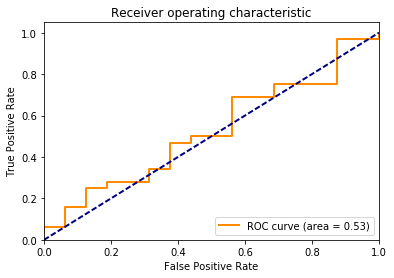

In [567]:
roc_info = roc_curve(y_test, scores[:,1])
auc_info = auc(roc_info[0], roc_info[1])
useful.createROCGraph(roc_info[0], roc_info[1], auc_info)

Normalized confusion matrix
[[ 0.12  0.88]
 [ 0.12  0.88]]


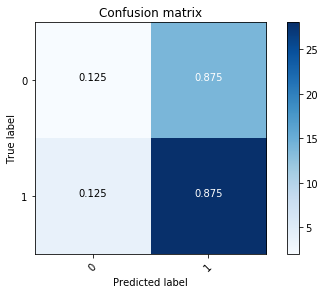

In [568]:
cm = confusion_matrix(y_test, logit.predict(X_test))
useful.plot_confusion_matrix(cm, ["0", "1"])

In [569]:
from sklearn.metrics import log_loss

In [574]:
log_loss([1,0,0,0,1,1], [0.333,0,0,0,0.333,0.333])

0.54980639450084701